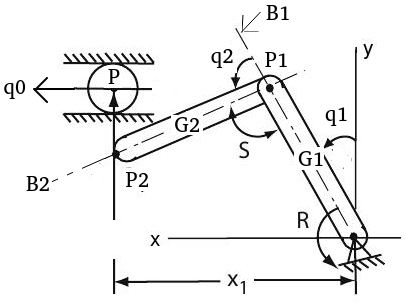

In [19]:
from sympy.physics.mechanics import *
from sympy import trigsimp,symbols,cos,sin
init_vprinting()

In [ ]:
q0,q1,q2 = dynamicsymbols('q0 q1,q2')
q0d,q1d,q2d = dynamicsymbols('q0 q1 q2',1)
u0,u1,u2 = dynamicsymbols('u0,u1,u2')

In [21]:
m0,m,I1,I2,L,g=symbols('m0,m,I1,I2,L,g')
R,S=symbols('R,S')
d=symbols('d')

In [22]:
N = ReferenceFrame('N')
A = N.orientnew('A','Axis',[0,N.z])
O=Point('O')
B1=N.orientnew('B1','Axis',[-q1, N.z])
P1 = O.locatenew('P1',L*B1.y)
G1 = O.locatenew('G1',(L/2)*B1.y)
B2=B1.orientnew('B2','Axis',[-q2, B1.z])
P2 = P1.locatenew('P2',L*B2.y)
G2 = P1.locatenew('G2',(L/2)*B2.y)
P = O.locatenew('P',q0*N.x)

In [23]:
P.set_vel(N,u0*N.x)
A.set_ang_vel(N,0)
B1.set_ang_vel(N,-u1*N.z)
B2.set_ang_vel(N,-(u1+u2)*N.z)
O.set_vel(N,0)
P1.v2pt_theory(O,N,B1)
G1.v2pt_theory(O,N,B1)
P2.v2pt_theory(P1,N,B2)
G2.v2pt_theory(P1,N,B2)

In [24]:
Link1=RigidBody('Link1',G1,B1,m,(inertia(B1,0,0,m*L**2/12),G1))
Link2=RigidBody('Link2',G2,B2,m,(inertia(B2,0,0,m*L**2/12),G2))
Par1=Particle('Par1',P,m0)
bodies=[Link1,Link2,Par1]
#loads=[(G1,-m*g*N.y),(G2,-m*g*N.y)]
loads=[(G1,0*N.y),(G2,0*N.y)]

In [25]:
coordinates=[q0,q1,q2]
speeds=[u0,u1,u2]
kde=[q0d-u0,q1d-u1,q2d-u2]

In [26]:
kane1= KanesMethod(N,coordinates,speeds,kde)

In [27]:
fr,frstar = kane1.kanes_equations(bodies,loads)

In [ ]:
#dir(kane)

In [ ]:
mm=kane1.mass_matrix

In [ ]:
trigsimp(mm)

In [ ]:
coordinates=[q0,q1,q2]
speeds=[u0,u1,u2]
kde=[q0d-u0,q1d-u1,q2d-u2]
q=[q0]
u=[u0]
q_dep=[q1,q2]
u_dep=[u1,u2]

In [ ]:
cons1=L*sin(q1)+L*sin(q1+q2)*-q0
cons2=L*cos(q1)+L*cos(q1+q2)*-d
cons=[cons1,cons2]
dcons1=L*cos(q1)*u1+L*cos(q1+q2)*(u1+u2)-u0
dcons2=-L*sin(q1)*u1-L*sin(q1+q2)*(u1+u2)
dcons=[dcons1,dcons2]

In [ ]:
kane2= KanesMethod(N,q_ind=q,u_ind=u,kd_eqs=kde,q_dependent=q_dep,
                  configuration_constraints=cons,u_dependent=u_dep,
                  velocity_constraints=dcons)

In [ ]:
fr,frstar = kane2.kanes_equations(bodies,loads)

In [ ]:
mm=kane2.mass_matrix
trigsimp(mm)

In [ ]:
trigsimp(kane2.forcing)